In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from math import sin, sqrt, pi

## One-dimensional particle in an infinite potential well

In Hinchliffe Section 11.3.1, the author described the particle in a one-dimensional infinite well. The particle in a one-dimensional infinite potential well is the most straightforward quantum mechanical system. It consists of a particle confined to a one-dimensional box of length L surrounded by barriers of infinite potential energy on each side.

It has the following equations to describe its behavior:

$$ \psi_{n}(x) = \sqrt{\frac{2}{L}} \sin\Bigl(\frac{n \pi x}{L}\Bigr) $$

$$ E_n = U_0 + \frac{n^2 h^2}{8 m L^2} $$

$$ n = 1, 2, 3, \dots $$

For simplicity, I will assume \\(U_0 = 0\\) throughout this demonstration.

In [31]:
class ParticleInABox1d:
    """
    This class models a one-dimensional particle in a box.
    """
    
    def __init__(self, mass, length):
        """
        Units for mass and length can be in any units you wish,
        as long as they are consistent.
        
        Parameters
        ----------
        mass: float
            The mass of the particle.
            
        length: float
            Length of the one-dimensional box.
        """
        self.mass = mass
        self.length = length
        
    def wavefunction(self, n, x):
        """
        Returns the value of the wavefunction with quantum number n
        at position x.
        
        Parameters
        ----------
        n: int
            Quantum number of the box.
        
        x: float
            Postion in the box to evaluate. 0 < x < self.length
            
        Returns
        -------
        float
            The value of the wavefunction at that point.
        """
        return sqrt(2 / self.length) * sin(n * pi * x / self.length)
    
    def prob_density(self, n, points=100):
        """
        Returns the probability density at the given number of points
        along the length of the box.
        
        Parameters
        ----------
        n: int
            The quantum number.
        
        points: int
            The number of points to sample along the length of the
            box.
            
        Returns
        -------
        np.array, list
            The first array are the x coordinates along the box, and the second
            array is the probability density at that point.
        """
        xs = np.linspace(0, self.length, points)
        ys = [self.wavefunction(n, x) ** 2 for x in xs]
        return xs, ys

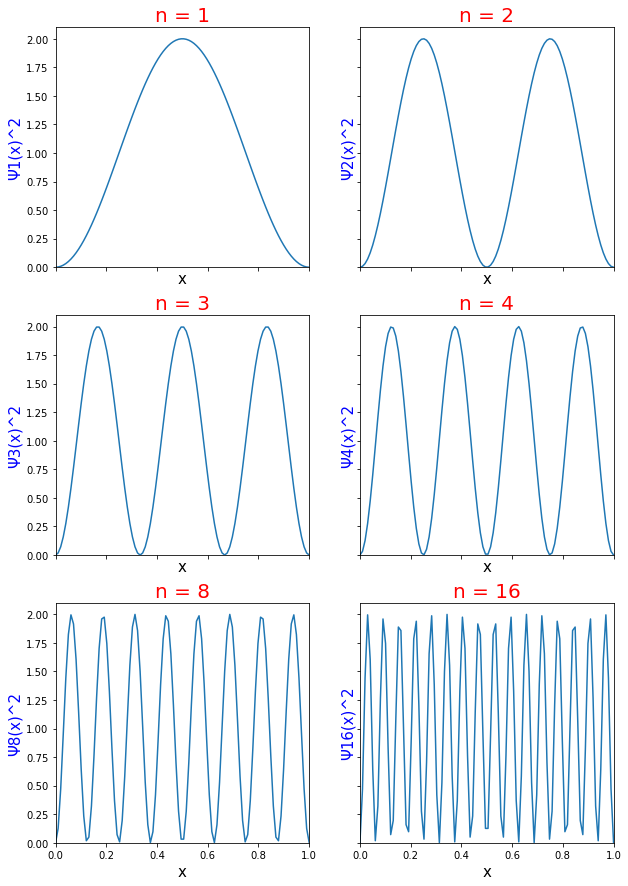

In [32]:
box = ParticleInABox1d(1, 1)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), sharex=True, sharey=True)

xs, ys = box.prob_density(n=1)
axs[0, 0].set_title('n = 1', size=20, color='r')
axs[0, 0].set_ylabel('Ψ1(x)^2', size=15, color='b')
axs[0, 0].set_xlabel('x', size=15)
axs[0, 0].set_xlim(0, box.length)
axs[0, 0].set_ylim(0, max(ys) * 1.05)
axs[0, 0].plot(xs, ys)

xs, ys = box.prob_density(n=2)
axs[0, 1].set_title('n = 2', size=20, color='r')
axs[0, 1].set_ylabel('Ψ2(x)^2', size=15, color='b')
axs[0, 1].set_xlabel('x', size=15)
axs[0, 1].set_xlim(0, box.length)
axs[0, 1].set_ylim(0, max(ys) * 1.05)
axs[0, 1].plot(xs, ys)

xs, ys = box.prob_density(n=3)
axs[1, 0].set_title('n = 3', size=20, color='r')
axs[1, 0].set_ylabel('Ψ3(x)^2', size=15, color='b')
axs[1, 0].set_xlabel('x', size=15)
axs[1, 0].set_xlim(0, box.length)
axs[1, 0].set_ylim(0, max(ys) * 1.05)
axs[1, 0].plot(xs, ys)

xs, ys = box.prob_density(n=4)
axs[1, 1].set_title('n = 4', size=20, color='r')
axs[1, 1].set_ylabel('Ψ4(x)^2', size=15, color='b')
axs[1, 1].set_xlabel('x', size=15)
axs[1, 1].set_xlim(0, box.length)
axs[1, 1].set_ylim(0, max(ys) * 1.05)
axs[1, 1].plot(xs, ys)

xs, ys = box.prob_density(n=8)
axs[2, 0].set_title('n = 8', size=20, color='r')
axs[2, 0].set_ylabel('Ψ8(x)^2', size=15, color='b')
axs[2, 0].set_xlabel('x', size=15)
axs[2, 0].set_xlim(0, box.length)
axs[2, 0].set_ylim(0, max(ys) * 1.05)
axs[2, 0].plot(xs, ys)

xs, ys = box.prob_density(n=16)
axs[2, 1].set_title('n = 16', size=20, color='r')
axs[2, 1].set_ylabel('Ψ16(x)^2', size=15, color='b')
axs[2, 1].set_xlabel('x', size=15)
axs[2, 1].set_xlim(0, box.length)
axs[2, 1].set_ylim(0, max(ys) * 1.05)
axs[2, 1].plot(xs, ys)

The plots above

## Two-dimensional particle in a box

Note: The two-dimensional particle in a box should not be confused with two non-interacting particles in a one-dimensional box. They are completely different concepts.

In [22]:
class ParticleInABox2d:
    def __init__(self, mass=1, length=1):
        """
        Parameters
        ----------
        mass: float
            The mass of the particle.
        
        length:
            Legnth of each side of the box in x and y dimensions.
        """
        self.mass = mass
        self.length = length
        
    def wavefunction(self, n, k, x, y):
        """
        Parameters
        ----------
        n: int
            Quantum number in the x dimension
            
        k: int
            Quantum number in the y dimension
            
        x: float
            x position in the box. Range from zero to self.length
            
        y: float
            y position in the box. Range from zero to self.length
            
        Returns
        -------
        float
            The value of the wavefunction n, k at x, y
        """
        return (2 / self.length) * sin(n * pi * x / self.length) * sin(k * pi * y / self.length)
    
    def prob_density(self, n, k, points=100):
        """
        Parameters
        ----------
        n: int
            Quantum number in the x dimension
        
        k: int
            Quantum number in the y dimension
            
        Returns
        -------
        np.array
            Float 2d numpy array of squares of wavefunctions at the various
            points.
        """
        xs = np.linspace(0.0, self.length, points)
        ys = np.linspace(0.0, self.length, points)
        zs = np.zeros((points, points), np.float64)
        for ix, x in enumerate(xs):
            for iy, y in enumerate(ys):
                zs[ix, iy] = self.wavefunction(n, k, x, y) ** 2
        return xs, ys, zs

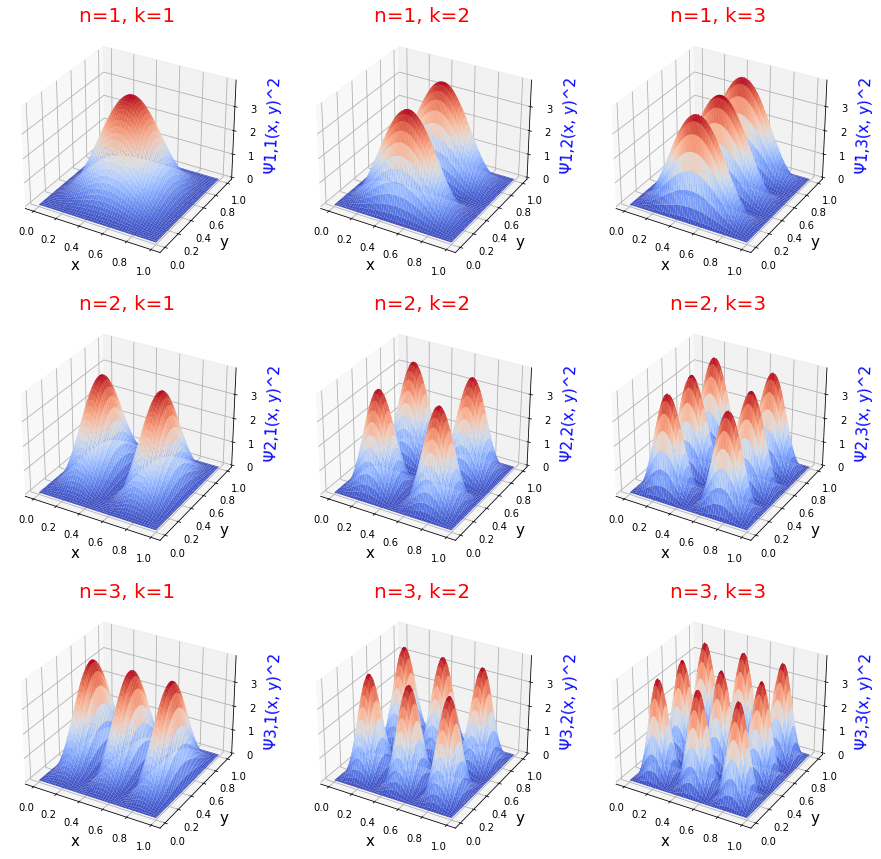

In [24]:
box_2d = ParticleInABox2d(mass=1.0, length=1.0)
ns = [1, 2, 3]
ks = [1, 2, 3]
fig, axs = plt.subplots(nrows=len(ns), ncols=len(ks), figsize=(15, 15), subplot_kw={"projection": "3d"})

for idx_n, n in enumerate(ns):
    for idx_k, k in enumerate(ks):
        xs, ys, zs = box_2d.prob_density(n, k)
        xs, ys = np.meshgrid(xs, ys)
        ax = axs[idx_n, idx_k]
        ax.set_title(f'n={n}, k={k}', size=20, color='r')
        ax.set_zlabel(f'Ψ{n},{k}(x, y)^2', size=15, color='b')
        ax.set_xlabel('x', size=15)
        ax.set_ylabel('y', size=15)
        ax.plot_surface(ys, xs, zs, cmap=cm.coolwarm, linewidth=0, antialiased=True)

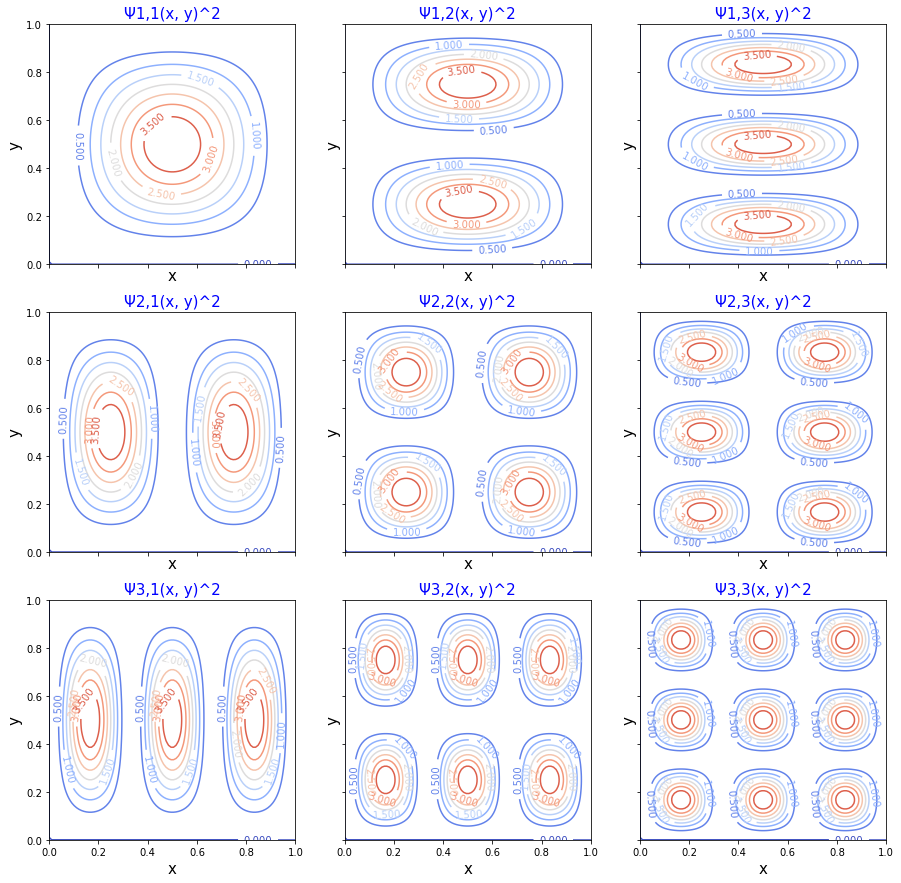

In [6]:
box_2d = ParticleInABox2d(mass=1.0, length=1.0)
ns = [1, 2, 3]
ks = [1, 2, 3]
fig, axs = plt.subplots(nrows=len(ns), ncols=len(ks), figsize=(15, 15), sharex=True, sharey=True)

for idx_n, n in enumerate(ns):
    for idx_k, k in enumerate(ks):
        xs, ys, zs = box_2d.prob_density(n, k)
        xs, ys = np.meshgrid(xs, ys)
        ax = axs[idx_n, idx_k]
        ax.set_title(f'Ψ{n},{k}(x, y)^2', size=15, color='b')
        ax.set_xlabel('x', size=15)
        ax.set_ylabel('y', size=15)
        cs = ax.contour(ys, xs, zs, cmap=cm.coolwarm, antialiased=True)
        ax.clabel(cs, inline=True, fontsize=10)